In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
base = pd.read_csv('/content/dataset.csv')

In [ ]:
base.shape

(114000, 21)

In [ ]:
base.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [3]:
base.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

In [4]:
base = base.drop_duplicates()
base = base.dropna()

In [5]:
base.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
base['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [ ]:
base['track_genre'].nunique()

114

In [ ]:
songs = base.loc[:, ['track_name','artists']]

In [ ]:
songs['artists'].value_counts()

The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: artists, Length: 31437, dtype: int64

In [ ]:
artistasMaisPopulares = base.loc[:, ['artists', 'popularity']]
artistasMaisPopulares = artistasMaisPopulares.groupby('artists').mean().sort_values('popularity', ascending = False)
artistas = artistasMaisPopulares.head(10)
artistas

,popularity
artists,
Sam Smith;Kim Petras,100.0
Bizarrap;Quevedo,99.0
Manuel Turizo,98.0
Bad Bunny;Chencho Corleone,97.0
Bad Bunny;Bomba Estéreo,94.5
Joji,94.0
Beyoncé,93.0
Harry Styles,92.0
Rema;Selena Gomez,92.0


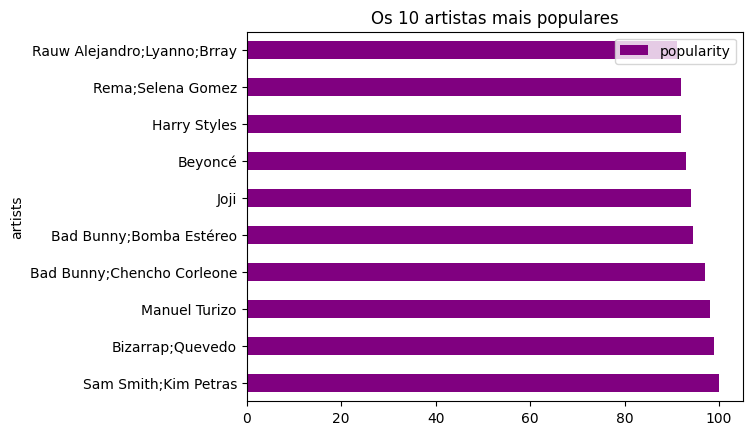

In [ ]:
artistas.plot.barh(color="purple")
plt.title("Os 10 artistas mais populares")
plt.show()

In [ ]:
musicasMaisPopulares = base.loc[:, ['track_name', 'popularity']]
musicasMaisPopulares = musicasMaisPopulares.sort_values('popularity', ascending = False)
musi = musicasMaisPopulares.head(10)
musi

,track_name,popularity
20001,Unholy (feat. Kim Petras),100
81051,Unholy (feat. Kim Petras),100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",99
89411,La Bachata,98
81210,I'm Good (Blue),98
68303,La Bachata,98
20008,I'm Good (Blue),98
88410,La Bachata,98
30003,I'm Good (Blue),98
67356,La Bachata,98


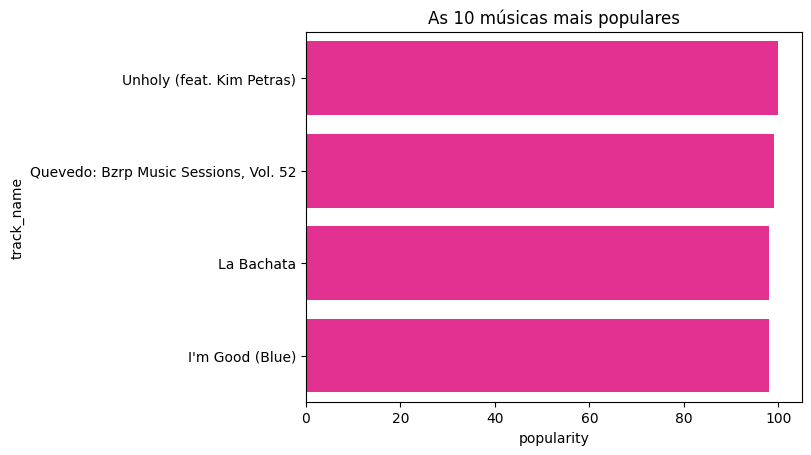

In [ ]:
sns.barplot(x="popularity", y="track_name", data= musi, color = 'deeppink')
plt.title("As 10 músicas mais populares")
plt.show()

In [ ]:
generosMaisPopulares = base.loc[:, ['track_genre', 'popularity']]
generosMaisPopulares = generosMaisPopulares.groupby('track_genre').mean().sort_values('popularity', ascending = False)
generos = generosMaisPopulares.head(5)
generos

,popularity
track_genre,
pop-film,59.283000
k-pop,56.952953
chill,53.651000
sad,52.379000
grunge,49.594000


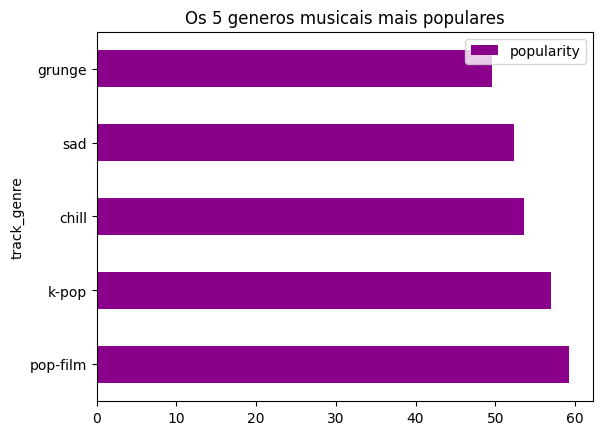

In [ ]:
generos.plot.barh(color="darkmagenta")
plt.title("Os 5 generos musicais mais populares")
plt.show()

In [6]:
conditionlist = [base['popularity'] >= 80, base['popularity'] < 80]
choicelist = [1,0]
base['popularity'] = np.select(conditionlist, choicelist, default=0)

In [ ]:
base.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(base['track_genre'])
base['track_genre'] = le.transform(base['track_genre'])
le.fit(base['explicit'])
base['explicit'] = le.transform(base['explicit'])
base

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0,230666,0,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0,149610,0,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0,210826,0,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0,201933,0,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,0,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95426,95426,1Cx5tsliVtAZRqh4e7l82t,Yuri Buenaventura,La navidad es todo aquello que nos hace record...,Salsa Dura,0,219906,0,0.815,0.8150,...,-5.334,1.0,0.0431,0.7210,0.010700,0.0407,0.883,100.057,4.0,95
95427,95427,7KGzIdQjVe2X4bQyCEEJvU,Mickey Taveras,Baladas Románticas ¡Éxitos Latino!,Cuando el Amor Se Acaba,0,284800,0,0.504,0.8680,...,-4.788,1.0,0.0440,0.5350,0.000684,0.1040,0.730,170.450,4.0,95
95428,95428,709UYYPe2As5Tgagz4cUyO,Nelson Arrieta;Ronald Borjas,Sobran Los Momentos (En Vivo),Te Encontraré (En Vivo),0,350184,0,0.674,0.6880,...,-7.250,1.0,0.0602,0.3050,0.000000,0.3810,0.423,91.110,4.0,95
95429,95429,6QCgQJDCGywcrE510fpGEd,Salserin,Entre Tu Y Yo,Un Beso No Es Pecado,0,271493,0,0.725,0.7230,...,-5.789,1.0,0.0369,0.4210,0.000002,0.2850,0.949,92.678,4.0,95


In [8]:
x = base[['track_genre', 'popularity', 'duration_ms', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'explicit']]
x = (x - x.min())/(x.max() - x.min())
xTrain, xTeste = train_test_split(x, test_size=0.25, random_state=42)

In [9]:
xTrain.popularity.value_counts(normalize=True)

0.0    0.988347
1.0    0.011653
Name: popularity, dtype: float64

In [10]:
xTeste.popularity.value_counts(normalize=True)

0.0    0.987468
1.0    0.012532
Name: popularity, dtype: float64

In [11]:
a = xTrain.drop('popularity', axis=1)
b = xTrain.popularity

In [12]:
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
for trainIndex, testeIndex in StratifKfold.split(a, b):
    xTrain, xTeste = a.iloc[trainIndex], a.iloc[testeIndex]
    yTrain, yTeste = b.iloc[trainIndex], b.iloc[testeIndex]


In [14]:
from sklearn.linear_model import LogisticRegression
treino = LogisticRegression().fit(xTrain, yTrain)

In [15]:
prevTreino = treino.predict(xTrain)
prevTeste = treino.predict(xTeste)

In [16]:
aux = x.drop(columns='popularity')

In [17]:
data = {
    "Features": aux.columns,
    "Coef": treino.coef_.tolist()[0]
}

df = pd.DataFrame(data)
df

,Features,Coef
0,track_genre,0.948999
1,duration_ms,-0.473985
2,danceability,2.105998
3,key,0.102072
4,loudness,2.425876
5,mode,-0.148896
6,speechiness,-1.909586
7,acousticness,-1.032502
8,instrumentalness,-2.125072
9,liveness,-1.619940


In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yTrain, prevTreino)

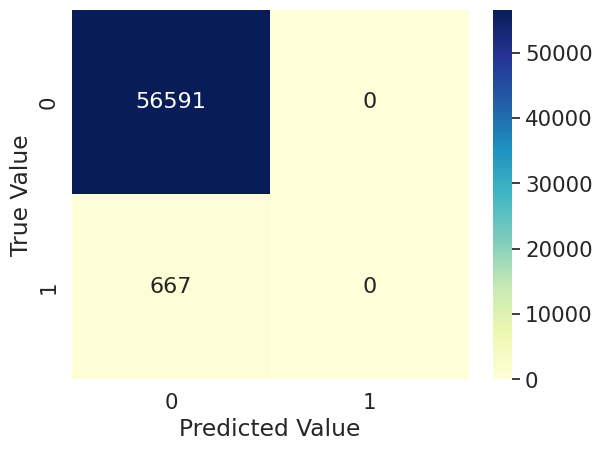

In [21]:
sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(conf_matrix,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(yTeste, prevTeste)

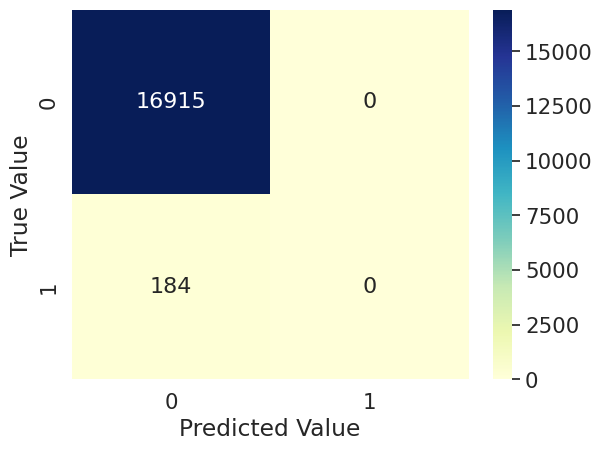

In [ ]:
sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(conf_matrix,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [39]:
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score, precision_score, recall_score

In [44]:
print(accuracy_score(yTrain, prevTreino))
print(f1_score(yTrain, prevTreino))
print(recall_score(yTrain, prevTreino))
print(precision_score(yTrain, prevTreino, zero_division=0))

0.9883509727898285
0.0
0.0
0.0


In [45]:
print(accuracy_score(yTeste, prevTeste))
print(f1_score(yTeste, prevTeste))
print(recall_score(yTeste, prevTeste))
print(precision_score(yTeste, prevTeste, zero_division=0))

0.988333100461087
0.0
0.0
0.0
